In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
demo = pd.read_csv('MSA_Race_Income_Density_BuildingAge.csv')

In [3]:
CBSAair = pd.read_csv("annual_aqi_by_cbsa_2017.csv")

In [4]:
# SE_T002_002 Population Density
# SE_T014_003 White Not Latino
# SE_T014_001 Total Population
# SE_T057_001 Median Household Income
# Geo_NAME Area Name + Micro/Metro
# Geo_FIPS code

In [5]:
demo["Geo"] = demo["Geo_NAME"].str.split(' ').str[0:-3].str.join(' ')
demo["CBSA Code"] = demo["Geo_FIPS"]% 100000

In [6]:
demo_mini = demo[["Geo","CBSA Code", "SE_T002_002", "SE_T014_003", "SE_T014_001", "SE_T057_001"]]
demo_mini = demo_mini.set_index("CBSA Code")
CBSAair = CBSAair.set_index("CBSA Code")

In [7]:
CBSAs = CBSAair.join(demo_mini)

In [8]:
CBSAs["Density"] = CBSAs["SE_T002_002"]
CBSAs["Income"] = CBSAs["SE_T057_001"]
CBSAs["Minority"] = 1 - CBSAs["SE_T014_003"]/CBSAs["SE_T014_001"]

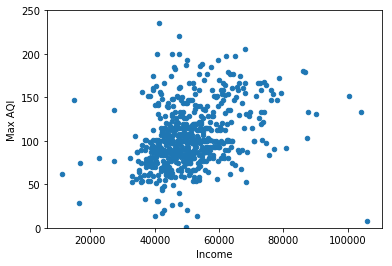

In [24]:
CBSAs.plot(x = "Income", y = "Max AQI", kind = 'scatter')
plt.ylim((0,250))
plt.show()

In [10]:
CBSAs.corr()["Income"]["Max AQI"]

0.17756264262193949

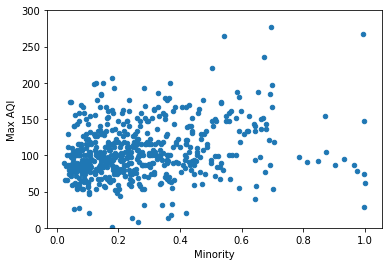

In [11]:
CBSAs.plot(x = "Minority", y = "Max AQI", kind = 'scatter')

plt.ylim((0,300))
plt.show()

In [33]:
CBSAs["AQI"] = CBSAs["Max AQI"]
income_lim = CBSAs[CBSAs["Max AQI"] < 200]


In [34]:
#x = income_lim["Income"]
#y = income_lim["Max AQI"]
est = smf.ols(formula='AQI ~ Income + Minority', data=income_lim)
#x2 = sm.add_constant(x)
#est = sm.OLS(y, x2, missing='drop')
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     52.42
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           1.27e-21
Time:                        13:12:38   Log-Likelihood:                -2782.3
No. Observations:                 572   AIC:                             5571.
Df Residuals:                     569   BIC:                             5584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3431      6.577      5.830      0.0